# Project 3: Regression

For this project, I will be using Kaggle House Prices dataset to predict house prices based on different features pertaining to the houses. 

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Experiment 1

### Data Inspection and Understanding

In [2]:
# read data
data = pd.read_csv('/content/train.csv')

In [3]:
# inspect data
data.shape

(1460, 81)

1460 is a good amount of data but it looks like there are a lot of independent variables. We might have to perform feature selection later on to reduce the number of variables. 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


After initial inspection, I found that the dataset has a mix of categorical and numerical data, there are some columns with nulls, and there are multiple data types. Let's take a closer look at the columns with nulls.

In [6]:
data.isna().sum()[data.isna().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

There seems to be a lot of columns with nulls, but I need to make sure that these are actual nulls (do not have any meaning). After carefully reading the data description, it looks like many nulls might indicate the inavailability of features (i.e. no fireplace) and not missing values. In such cases, I will need to replace NaN with appropriate values.


Now let's look at some statistics. 

In [7]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Let's map the house prices values to see if our data is normally distributed.

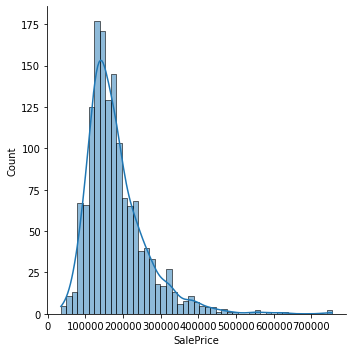

In [8]:
sns.displot(data['SalePrice'], kde=True);

Looks like our target variable is skewed to the right. I might have to transform it so it is normally distributed to optimize the linear regression model later on.

Let's see the correlation between the variables.

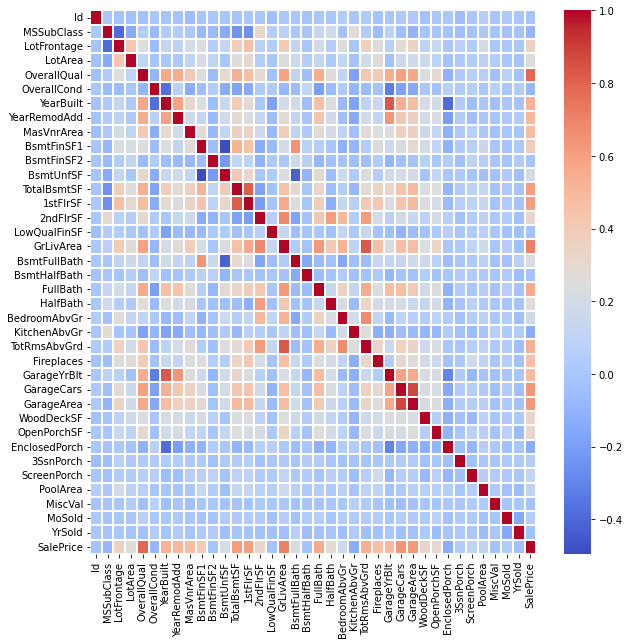

In [9]:
# correlation heatmap
plt.figure(figsize=(10,10))
ax = sns.heatmap(data.corr(), cmap = "coolwarm", linewidth=1)


In [10]:
high_corr = data.corr()
high_corr_features = high_corr.index[abs(high_corr["SalePrice"]) >= 0.5]
print(high_corr_features)

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')


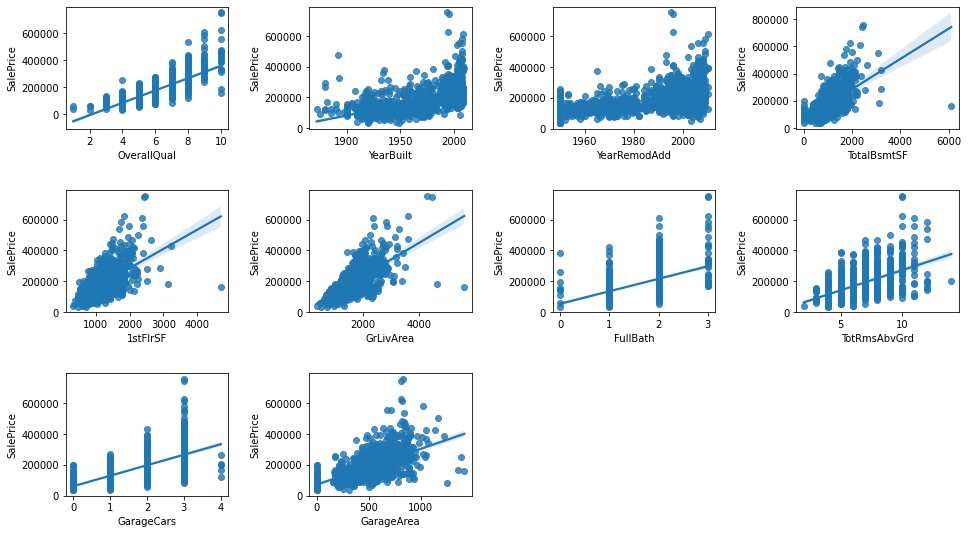

In [11]:
# Plot to get the nature of highly correlated data
plt.figure(figsize=(16,9))
for i in range(len(high_corr_features)):
    if i <= 9:
        plt.subplot(3,4,i+1)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(data=data, x = high_corr_features[i], y = 'SalePrice')

### Preprocessing

For this first experiment, I will perform basic data cleaning and apply a linear regression model without much data engineering.

There is a lot of preprocessing to do with this dataset. I will first drop unneccessary column: Id. 

In [12]:
data.drop(columns = 'Id', axis = 1, inplace = True)

There are some numerical variables that are supposed to be categorical: MSSubClass, YrSold, MoSold. I will convert them into strings.

In [13]:
# Convert some features to categorical
data['MSSubClass'] = data['MSSubClass'].apply(str)
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

Next, I will replace NaN with appropriate values. For numerical value like LotFrontage, I will impute using the median of the neighborhood LotFrontage since houses in the same neighborhood tend to have similar lot sizes.

In [14]:
data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

Next, I will fill in appropriate values for the rest of the nulls of numerical variable MasVnrArea and categorical variables: Alley, MasVnrType, all the basement variables that have missing values, Electrical, FireplaceQu, all the variables for Garage, PoolQC, Fence, and MiscFeature.

In [15]:
# impute the Electrical with SBrkr since all other houses have this electrical system
data['Electrical'] = data['Electrical'].fillna("SBrkr")
# for houses with no masonry veneer, the MasVnrArea is 0
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)
# for houses with no garage, GarageYrBlt is 0
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(0)
# the rest is "None"
objects = []
for i in data.columns:
  if data[i].dtype == object:
    objects.append(i)
    data.update(data[objects].fillna('None'))

In [16]:
# check for nulls
data.isna().sum()[data.isna().sum() > 0]

Series([], dtype: int64)

Since Linear Regression requires the independent variables to be numerical, I will find all the categorical columns and convert them into numerical data. 
There are many ways to transform categorical data to numerical data but I am applying One Hot Encoding here.

In [17]:
# get categorical columns
cat_cols = list(data.select_dtypes(include=['object']).columns)
cat_cols

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [18]:
# dummy encode the categorical columns
data_encoded = pd.get_dummies(data, columns = cat_cols)
data_encoded

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,1999,2000,0.0,0,0,953,...,0,0,0,1,0,0,0,0,1,0
1456,85.0,13175,6,6,1978,1988,119.0,790,163,589,...,0,0,0,1,0,0,0,0,1,0
1457,66.0,9042,7,9,1941,2006,0.0,275,0,877,...,0,0,0,1,0,0,0,0,1,0
1458,68.0,9717,5,6,1950,1996,0.0,49,1029,0,...,0,0,0,1,0,0,0,0,1,0


I will proceed to modeling using linear regression.

### Modeling

In [19]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [20]:
data_encoded

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,1999,2000,0.0,0,0,953,...,0,0,0,1,0,0,0,0,1,0
1456,85.0,13175,6,6,1978,1988,119.0,790,163,589,...,0,0,0,1,0,0,0,0,1,0
1457,66.0,9042,7,9,1941,2006,0.0,275,0,877,...,0,0,0,1,0,0,0,0,1,0
1458,68.0,9717,5,6,1950,1996,0.0,49,1029,0,...,0,0,0,1,0,0,0,0,1,0


In [21]:
# separate data into independent and dependent variables
X = data_encoded.drop(columns = 'SalePrice', axis = 1)
y = data_encoded['SalePrice']

In [22]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [23]:
# fit data to the model
re = LinearRegression()
re.fit(X_train, y_train)

LinearRegression()

### Evaluation

In [24]:
# get predictions
y_pred = re.predict(X_test)

In [25]:
# get score, default for linear regression is coefficient of determination
re.score(X_test, y_test)

0.6067748512718794

In [26]:
# calculate MSE and RMSE
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Squared Error: 2669602169.0866427
Root Mean Squared Error: 51668.19301162605


The result is alright but not as good as what I expected! The coefficient of determination of the prediction is only ~0.6, which means only ~60% of the data fits the linear regression model. The MSE and RMSE are also quite high. Let's see if feature selection and other mechanisms to optimize linear regression model performance help improve the results.

## Experiment 2

### Further Preprocessing/Feature Engineering

For this experiment, I will perform further preprocessing and feature selection to improve the linear regression model's performance. 


First, since linear regression is very sensitive to outlier, I will check for outlier and remove if there are any. Since there are a few outliers for GrLivArea, I will remove those.

In [27]:
data2 = data.copy()

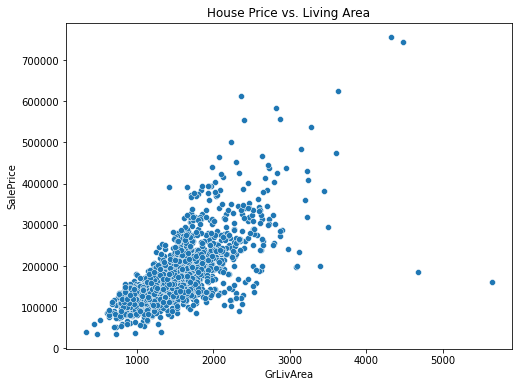

In [28]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data2)
title = plt.title('House Price vs. Living Area')

In [29]:
outlier_index = data2[(data2.GrLivArea > 4000)
                           & (data2.SalePrice < 200000)].index
data2.drop(outlier_index, axis=0, inplace=True)


Since there are multiple features that can be combined, I will create 3 new features. TotalSqFeet will be the total area of the entire house including all floors and the basement. TotalBath will be the total number of bathrooms including full and half baths.

In [30]:
data2['TotalSqFeet'] = data2['TotalBsmtSF'] + data2['1stFlrSF'] + data2['2ndFlrSF']
data2['TotalBath'] = data2.FullBath + data2.BsmtFullBath + 0.5 * (data2.HalfBath + data2.BsmtHalfBath)

Next, I will examine the skewness of the variables and try to normalize them.

First, I will examine the target variable SalePrice and normalize it. Since it is skewed to the right, I will apply log(1+x) transformation to it to obtain normal distribution.

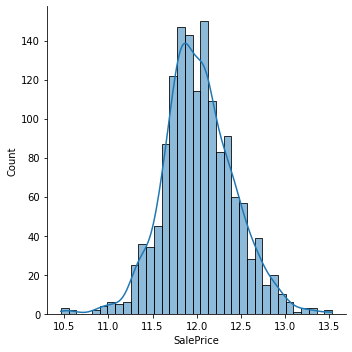

In [31]:
# use np.log1p to apply log transformation
data2["SalePrice"] = np.log1p(data2["SalePrice"])

#Check the new distribution 
sns.displot(data2['SalePrice'], kde=True)

Next, I will check to see if the numerical variables other than the target are skewed. If they have skewness > 0.5, I will apply log transformation to normalize them.

In [32]:
# get the top skewed values
skewness = data2.skew().sort_values(ascending=False)
skewness[abs(skewness) > 0.75]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


MiscVal          24.460085
PoolArea         15.948945
LotArea          12.573925
3SsnPorch        10.297106
LowQualFinSF      9.004955
KitchenAbvGr      4.484883
BsmtFinSF2        4.251925
ScreenPorch       4.118929
BsmtHalfBath      4.100114
EnclosedPorch     3.087164
MasVnrArea        2.696329
OpenPorchSF       2.339829
LotFrontage       1.547767
WoodDeckSF        1.545805
MSSubClass        1.407011
GrLivArea         1.010992
BsmtUnfSF         0.920903
1stFlrSF          0.887637
2ndFlrSF          0.812957
TotalSqFeet       0.804321
BsmtFinSF1        0.764789
GarageYrBlt      -3.866380
dtype: float64

In [33]:
# List of skewed columns
skewed_cols = list(skewness[abs(skewness) > 0.5].index)
# Remove 'MSSubClass' and 'SalePrice'
skewed_cols = [
    col for col in skewed_cols if col not in ['MSSubClass', 'SalePrice']
]
# Log-transform skewed columns
for col in skewed_cols:
    data2[col] = np.log(1 + data2[col])

I will then scale the data using RobustScaler

In [34]:
# use Robust Scaler to scale the numerical columns
from sklearn.preprocessing import RobustScaler
num_cols = list(data2.select_dtypes(exclude=['object']).columns)
scaler = RobustScaler()
data2[num_cols] = scaler.fit_transform(data2[num_cols])

Similarly, I will encode categorical columns before using the linear regression model.

In [35]:
# dummy encode the categorical columns
data_encoded2 = pd.get_dummies(data2, columns = cat_cols)
data_encoded2

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.257516,-0.266140,0.5,0.000000,0.659444,0.241655,1.035024,0.093330,0.000000,-0.898157,...,0,0,0,1,0,0,0,0,1,0
1,0.464671,0.030467,0.0,2.630317,0.076191,-0.486598,0.000000,0.142888,0.000000,-0.403505,...,0,0,0,1,0,0,0,0,1,0
2,-0.100761,0.399160,0.5,0.000000,0.616510,0.214858,0.997909,0.036576,0.000000,-0.074216,...,0,0,0,1,0,0,0,0,1,0
3,-0.535329,0.018328,0.5,0.000000,-1.271406,-0.649783,0.000000,-0.086499,0.000000,0.095602,...,0,0,0,1,1,0,0,0,0,0
4,0.634651,0.950309,1.0,0.000000,0.595027,0.161224,1.148177,0.081931,0.000000,0.020085,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.421564,-0.417593,0.0,0.000000,0.573534,0.161224,0.000000,-0.905597,0.000000,0.537329,...,0,0,0,1,0,0,0,0,1,0
1456,0.675896,0.766342,0.0,1.000000,0.119667,-0.161710,0.937910,0.110423,5.099866,0.163120,...,0,0,0,1,0,0,0,0,1,0
1457,-0.204486,-0.108735,0.5,3.313807,-0.691848,0.321966,0.000000,-0.049882,0.000000,0.472681,...,0,0,0,1,0,0,0,0,1,0
1458,-0.100761,0.058626,-0.5,1.000000,-0.493038,0.053795,0.000000,-0.309986,6.937314,-4.805231,...,0,0,0,1,0,0,0,0,1,0


Similar to experiment 1, I will see how the linear regression model performs after all these extra preprocessing steps.

In [36]:
# separate data into independent and dependent variables
X = data_encoded2.drop(columns = 'SalePrice', axis = 1)
y = data_encoded2['SalePrice']
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# fit data to the model
re = LinearRegression()
re.fit(X_train, y_train)

LinearRegression()

It's time to evaluate this experiment.

In [37]:
# get predictions
y_pred = re.predict(X_test)
# get score, default for linear regression is coefficient of determination
re.score(X_test, y_test)

0.868336229444385

In [38]:
# calculate MSE, RMSE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Squared Error: 0.08938188375707978
Root Mean Squared Error: 0.2989680313295717


Wow!!! It is crazy how much the score improves after all the extra preprocessing and data engineering! The coefficient of determination is 0.86, and the MSE and RMSE reduced significantly! I think the scaling of data had the biggest impact in improving the score.

## Experiment 3

### Modeling

For the final experiment, I will use a different model for this dataset. I will try Ridge regression model to see if there is any difference in performance. Ridge regression is a technique that can be used to predict data with multicollinearity.